# Análisis de componentes principales 

El análisis de componentes principales (PCA) tiene como propósito detectar la correlación entre las variables. Si existe una fuerte correlación entre las variables, el intento de reducir la dimensionalidad  tiene sentido.

Lo que el PCA hace es  encontrar las direcciones de máxima varianza en los datos de alta dimensión, por ejemplo $d$ y proyectarlo sobre un subespacio dimensional $k$ más pequeño al tiempo que conserva la mayor parte de la información.

El enfoque del PCA, se basa en los siguientes pasos:

* Normalizar los datos.
* Obtenemos los autovectores (principales componentes) y autovalores desde la matriz covarianza o matriz de correlación, o llevar a cabo SVD.
* Ordenar los autovalores en orden descendiente y escogemos los $k$ autovectores  que corresponden  a los $k$ mayores autovalores, donde $k$ es el número de dimensiones del nuevo subespacio $(k \leq d)$.
* Construir la matriz proyección $P$ desde los $k$ autovectores.
* Transformar el conjunto de datos $X$ via $P$ para obtener un subespacio $Y$ de dimensión  $k$ .


Para mostrar un ejemplo de aplicación de PCA, usaremos la base de datos `iris`, que contiene la medida de $150$ flores iris, desde $3$ diferentes especies. Las clases son:

- Iris-setosa ($n=50$)
- Iris-versicolor ($n=50$)
- Iris-virginica ($n=50$)

Y las características del conjunto de datos son:


- longitud sepalo en cm
- ancho   sepalo  en cm
- longitud petalo en cm
- ancho petalo     en cm


In [2]:
# Cargamos los datos usando 
import  pandas as pd

df = pd.read_csv(
    filepath_or_buffer='iris.csv',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_anc', 'petal_len', 'petal_anc', 'clases']
df.dropna(how="all", inplace=True) 

df.head()

,sepal_len,sepal_anc,petal_len,petal_anc,clases
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Diviendo los datos en X y clases y

X = df.ix[:,0:4].values
y = df.ix[:,4].values

Ahora los datos $X$, se han dividido en una matriz $150 \times 4$ donde las columnas son las diferentes características y cada fila representa una muestra de flores. Cada fila de $X$ puede ser visto con un vector de dimensión $4$.

$$\mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix}
= \begin{pmatrix} \text{longitud sepalo} \\ \text{ancho sepalo} \\\text{longitud petalo} \\ \text{ancho petalo} \end{pmatrix}$$

### Normalizar datos

El PCA produce un subespacio  de características que maximiza la varianza a lo largo de los ejes,  tiene sentido  normalizar los datos, sobre todo, si se mide en diferentes escalas. Si bien, en nuestro ejemplos todas las características del conjunto de datos `iris` se miden en centímetros,  nos permite continuar con la transformación de los datos sobre una unidad de escala (media = 0 y varianza = 1), lo cual es un requisito para el funcionamiento óptimo de muchos algoritmos de machine learning.

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)



### Calculando los autovectores y autovalores

Los autovectores y autovalores de una matriz de covarianza (o correlación) representan el "núcleo" de un PCA: Los autovectores (componentes principales) determinan las direcciones del nuevo  espacio de  características, y los autovalores determinan  su magnitud. En otras palabras, los autovalores  describen  la varianza de los datos a lo largo de los nuevos ejes de  características.

El enfoque clásico de la PCA es realizar la descomposición  en la matriz de covarianza $\sigma$, que es una matriz $d\times d$  donde cada elemento representa la covarianza entre dos características. La covarianza entre dos características se calcula como sigue:

$$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$$


Podemos resumir el cálculo de la matriz de covarianza a través de la siguiente ecuación matricial:

$$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$$


donde $\mathbf{\bar{x}}$ es la media de $\mathbf{\bar{x}} = \sum\limits_{k=1}^n x_{i}$. 


La media es un vector de dimensión $d$, donde cada valor de este vector representa la media muestral de una columna de características en el conjunto de datos.

In [5]:
# Algunos ejemplos preliminares

import numpy as np

X1 = np.random.random(10)
Y1 = np.random.random(10)

np.cov(X1, Y1) # Covarianza usando numpy

array([[ 0.05128345, -0.01998437],
       [-0.01998437,  0.04359458]])

In [6]:
# Podemos extender a mas de dos variables  
Z1 = np.random.random(10)
np.cov([X1, Y1, Z1])

array([[ 0.05128345, -0.01998437, -0.01121   ],
       [-0.01998437,  0.04359458, -0.04122589],
       [-0.01121   , -0.04122589,  0.10084593]])

In [7]:
# Descomposicion de una matriz covarianza
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


mu = [0,0]
sigma = [[0.6,0.2],[0.2,0.2]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, n).T

A = np.cov(x)

In [8]:
e, v = np.linalg.eig(A)
e

array([ 0.70389368,  0.11671504])

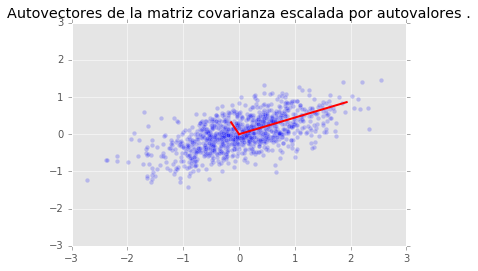

In [9]:
# Realicemos un grafico con matplotlib

plt.style.context('seaborn-whitegrid')

plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e, v.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3])
plt.title('Autovectores de la matriz covarianza escalada por autovalores .');

In [10]:
# Para el caso del conjunto de datos iris

import pprint

media_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - media_vec).T.dot((X_std - media_vec)) / (X_std.shape[0]-1)
print('Matriz covarianza')
pprint.pprint(cov_mat)



Matriz covarianza
array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])


In [11]:
# descomposicion de la matriz covarianza para el conjunto de datos iris

cov_matriz = np.cov(X_std.T)

auto_vals, auto_vecs = np.linalg.eig(cov_matriz)


print('Autovectores ' )
pprint.pprint(auto_vecs)
print('Autovalores ' )
pprint.pprint(auto_vals)



Autovectores 
array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])
Autovalores 
array([ 2.93808505,  0.9201649 ,  0.14774182,  0.02085386])


La matriz de correlación se puede interpretar como la matriz de covarianza normalizada. La descomposición de los datos normalizados sobre la correlación se puede hacer con `numpy`:

In [12]:
# descomposicion de la matriz correlacion  para el conjunto de datos iris normalizados

cor_mat1 = np.corrcoef(X_std.T)

auto_vals, auto_vecs = np.linalg.eig(cor_mat1)

print('Autovectores' )
print('Autovalores ')

print('Autovectores ' )
pprint.pprint(auto_vecs)
print('Autovalores ' )
pprint.pprint(auto_vals)

Autovectores
Autovalores 
Autovectores 
array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])
Autovalores 
array([ 2.91849782,  0.91403047,  0.14675688,  0.02071484])


In [13]:
# # descomposicion de la matriz correlacion  para el conjunto de datos iris

import pprint 

cor_mat2 = np.corrcoef(X.T)

auto_vals, auto_vecs = np.linalg.eig(cor_mat2)

print('Autovectores:'  )
pprint.pprint(auto_vecs)
print('Autovalores: ' )
pprint.pprint(auto_vals)


Autovectores:
array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])
Autovalores: 
array([ 2.91849782,  0.91403047,  0.14675688,  0.02071484])


En todos los casos se producen los mismos autovalores y autovectores.

### SVD

Mientras que la descomposición de la matriz de covarianza o correlación puede ser más intuitiva , la mayoría de las implementaciones de PCA realizan `SVD` para mejorar la eficiencia computacional.

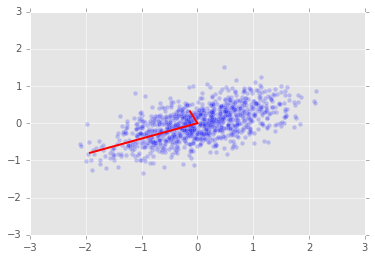

In [14]:
# Veamos un ejemplo

plt.style.context('seaborn-whitegrid')
mu = [0,0]
sigma = [[0.6,0.2],[0.2,0.2]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, n).T

e1, v1 = np.linalg.eig(np.dot(x, x.T)/(n-1))
u, s, v = np.linalg.svd(x)

e2 = s**2/(n-1)
v2 = u
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e2, v2):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);




In [15]:
# Veamos los resultados obtenidos 

print("e1:autovalor de la matriz covarianza")
pprint.pprint(e1)

print("e1:autovalor desde SVD")
pprint.pprint(e2)

print("v1:autovector de la matriz covarianza")
pprint.pprint(v1)

print("e1:autovalor desde SVD")
pprint.pprint(v2)

e1:autovalor de la matriz covarianza
array([ 0.69405123,  0.11427228])
e1:autovalor desde SVD
array([ 0.69405123,  0.11427228])
v1:autovector de la matriz covarianza
array([[ 0.9240296 , -0.38232093],
       [ 0.38232093,  0.9240296 ]])
e1:autovalor desde SVD
array([[-0.9240296 , -0.38232093],
       [-0.38232093,  0.9240296 ]])


In [16]:
# Para el caso del conjunto de datos iris tenemos

u,s,v = np.linalg.svd(X_std.T)
u



array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

## Seleccionando los componentes principales

### Ordenando los autovalores

El objetivo del  PCA es reducir la dimensionalidad del espacio de características originales proyectándolo sobre un subespacio más pequeño, donde los autovectores  se formarán los ejes. Sin embargo, los autovectores solamente definen  las direcciones del nuevo eje, desde que ellos  tienen  la misma unidad de longitud  $1$, que se  puede confirmar por las siguientes dos líneas de código:

In [17]:
for ev in auto_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Unidad de longitud es 1')


Unidad de longitud es 1


Para  decidir qué autovectores  pueden `bajar` sin perder demasiada información para la construcción de subespacio dimensional inferior, tenemos que inspeccionar los autovalores correspondientes: autovectores  con los autovalores e menor valor que  llevan la menor cantidad de información acerca de la distribución de los datos; esos son los que se pueden descartar.

Con el fin de hacer esto, el enfoque  es clasificar los autovalores desde el  mayor a menor valor , con el fin de elegir los $k$ autovectores de mayor valor.

In [18]:
# Lista de tuplas de  (autovalores, autovectores) tuples

par_auto = [(np.abs(auto_vals[i]), auto_vecs[:,i]) for i in range(len(auto_vals))]

# Ordenamos las tuplas (autovalores, autovectores) desde el mayor al menor valor

par_auto.sort()
par_auto.reverse()

# Cofirmamos que la lista es ordenada en orden decreciente de autovalores

print('Autovalores en orden decreciente:')
for i in par_auto:
    print(i[0])


Autovalores en orden decreciente:
2.91849781653
0.914030471468
0.146756875571
0.0207148364286


Después de clasificar los autovalores y autovectores,  debemos conocer cuantos componentes principales se va a elegir para el subespacio de características. 

Una medida útil es la llamada "varianza explicada", que se puede calcular a partir de los autovalores. La varianza explicada nos dice cuanta  cantidad de información (varianza) se puede atribuir a cada uno de los componentes principales.

In [19]:
total = sum(auto_vals)
var_exp = [(i / total)*100 for i in sorted(auto_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


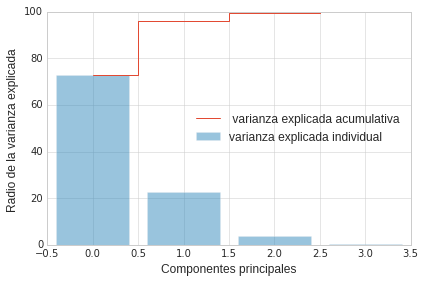

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='varianza explicada individual')
    plt.step(range(4), cum_var_exp, where='mid',
             label=' varianza explicada acumulativa')
    plt.ylabel('Radio de la varianza explicada ')
    plt.xlabel('Componentes principales')
    plt.legend(loc='best')
    plt.tight_layout()



El gráfico de arriba muestra que la mayor parte de la varianza ($72,77\%$ de la varianza para ser exactos) se puede explicar por el primer componente principal . El segundo componente principal aún conserva algo de información ($23,03\%$), mientras que los componentes principales tercero y cuarto con seguridad pueden ser dejados sin perder a mucha información. Juntos, los dos primeros componentes principales contienen $95,8\%$ de la información.

## Matriz proyección

La construcción de la matriz de proyección  se utiliza para transformar los datos del conjunto de datos `iris` a un nuevo suespacio de características. La matriz de proyección"  es básicamente una matriz de nuestros  $k$  mayores  autovectores concatenados.

Aquí, estamos reduciendo el  espacio de $4$ dimensiones a un  subespacio de características  de $2$ dimensiones, escogiendo  dos autovectores con los mayores autovaores  para construir la matriz de proyección $P$ de autovectores de orden $ d \times k$.

In [21]:
# Construccion de la matriz proyeccion 

matriz_P = np.hstack((par_auto[0][1].reshape(4,1),
                      par_auto[1][1].reshape(4,1)))

print('Matriz de proyeccion:')
pprint.pprint(matriz_P)


Matriz de proyeccion:
array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])


### Proyección sobre un nuevo subespacio de características

En este último paso usaremos la matriz de proyección de orden $4 \times 2$ que transforma el conjunto de datos en un nuevo subspacio via la siguiente ecuación

$$\mathbf{Z} = \mathbf{X} \times  \mathbf{Y}$$

donde $\mathbf{Z}$ es una matriz de orden $150 \times 2$.

In [27]:
Z = X_std.dot(matriz_P)


## PCA  en scikit-learn



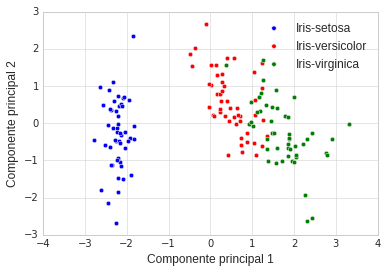

In [42]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
Z = pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    nombres = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
    plt.figure()
    for c, i, nombres in zip("brg", [0, 1, 2], nombres ):
        plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c, label=nombres)
        plt.xlabel('Componente principal 1')
        plt.ylabel('Componente principal 2')
        plt.legend()
